# Easy level

Исследуем поведение одномерного логистического отображения, задаваемого рекуррентной формулой:

$$x_{n+1} = r x_n (1 - x_n)$$

**Гипотеза:** При значениях параметра $r \in (0, 1]$ и начальном условии $x_0 \in (0, 1)$, траектория системы не покидает интервал $(0, 1)$ для любого шага $n$.


## Обоснование корректности отображения

Проведем доказательство методом математической индукции.

**1. База ($n=0$):**
Выполняется по условию: $0 < x_0 < 1$.

**2. Шаг индукции:**
Пусть утверждение верно для шага $k$, то есть $x_k \in (0, 1)$. Покажем, что $x_{k+1}$ также принадлежит этому интервалу.

Рассмотрим функцию $f(x) = r x (1 - x)$.
Очевидно, что при $x_k \in (0, 1)$ и $r > 0$, значение $x_{k+1} > 0$ как произведение положительных величин.

Для оценки сверху найдем максимум функции $g(x) = x(1-x)$. Это парабола ветвями вниз, её вершина находится в точке $x=0.5$, а максимальное значение равно $0.5 \cdot (1 - 0.5) = 0.25$.

Следовательно, для любого $x_k$:
$$x_{k+1} = r \cdot x_k(1-x_k) \le r \cdot 0.25$$

Так как по условию $r \le 1$, то:
$$x_{k+1} \le 0.25 < 1$$

**Заключение:**
Мы показали, что $0 < x_{k+1} < 1$. Согласно принципу индукции, утверждение справедливо для всех $n \in \mathbb{N}$.


## Анализ графика функции $x_n(x_{n-1})$

Зависимость следующего состояния системы от предыдущего описывается уравнением $f(x) = rx - rx^2$. С геометрической точки зрения это уравнение задает **квадратичную параболу**.

Характеристики кривой:
*   **Ветви:** Коэффициент при старшей степени ($-r$) отрицателен, значит, ветви параболы смотрят вниз.
*   **Корни:** График проходит через ось абсцисс в точках $0$ и $1$.
*   **Экстремум:** Вершина параболы, соответствующая максимуму функции, расположена симметрично относительно корней, в точке $x=0.5$. Высота вершины составляет $r/4$.

Таким образом, параметр $r$ выступает в роли масштабного коэффициента, растягивающего параболу вдоль оси ординат. При $r=1$ вершина достигает отметки $0.25$, а при увеличении $r$ парабола становится "выше".


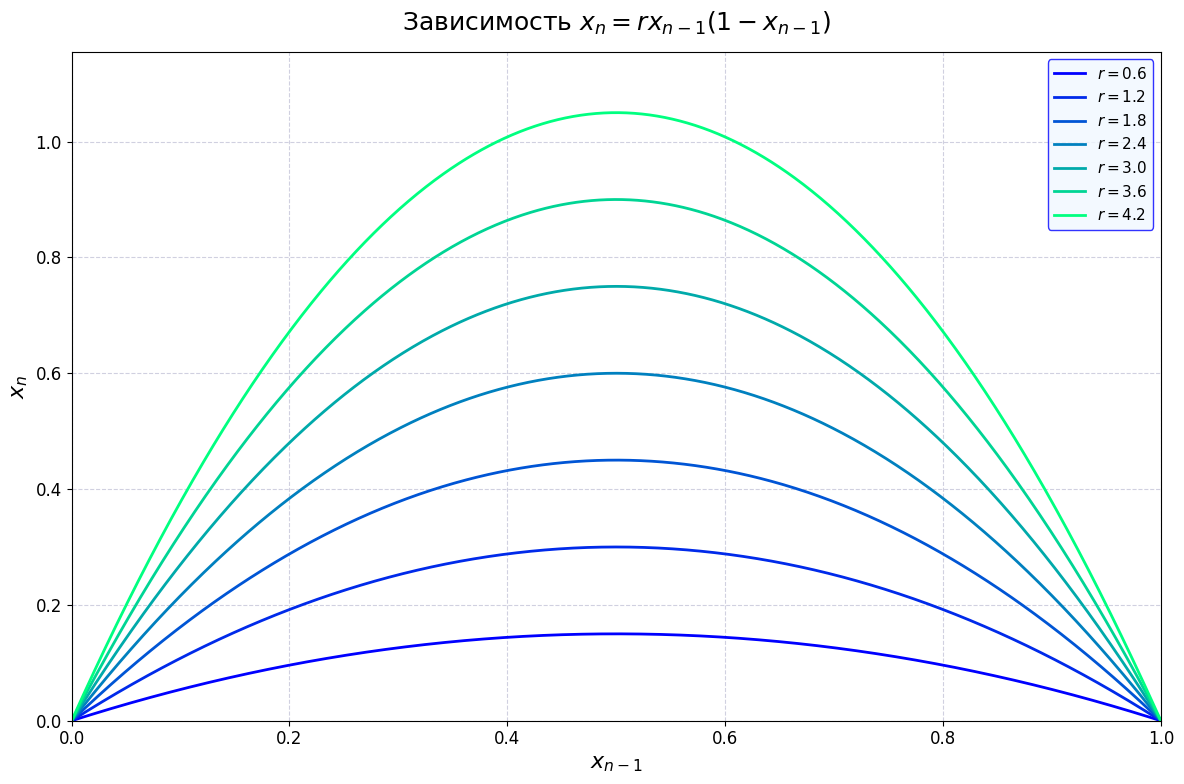

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

abscissa = np.linspace(0, 1, 1000)
parameters = np.array([0.6 * k for k in range(1, 8)])

plt.rcParams.update({'font.size': 12}) # Общий размер шрифта

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

# Сине-фиолетовая гамма (Cool)
colors = plt.cm.winter(np.linspace(0, 1, len(parameters)))

for i, r_val in enumerate(parameters):
    ordinates = r_val * abscissa * (1 - abscissa)
    # Используем пунктирную линию для разнообразия
    ax.plot(abscissa, ordinates, label=f'$r = {r_val:.1f}$', 
            linewidth=2, linestyle='-', color=colors[i])

ax.set_xlabel('$x_{n-1}$', fontsize=16)
ax.set_ylabel('$x_n$', fontsize=16)
ax.set_title('Зависимость $x_n = r x_{n-1} (1 - x_{n-1})$', fontsize=18, pad=15)
ax.grid(True, linestyle='--', alpha=0.3, color='#666699')
ax.legend(frameon=True, fontsize=11, facecolor='#F0F8FF', edgecolor='blue')
ax.set_xlim(0, 1)
ax.set_ylim(0, np.max(parameters) / 4 * 1.1)

plt.tight_layout()
plt.show()

## Точечное отображение (Вариант $N=0$)

Рассмотрим точечное отображение:

$$g(x_{n+1}) = r x_n (1 - x_n)(2 + x_n)$$

где параметр $r \in \left[0, \frac{27}{2(7\sqrt{7}-10)}\right]$.


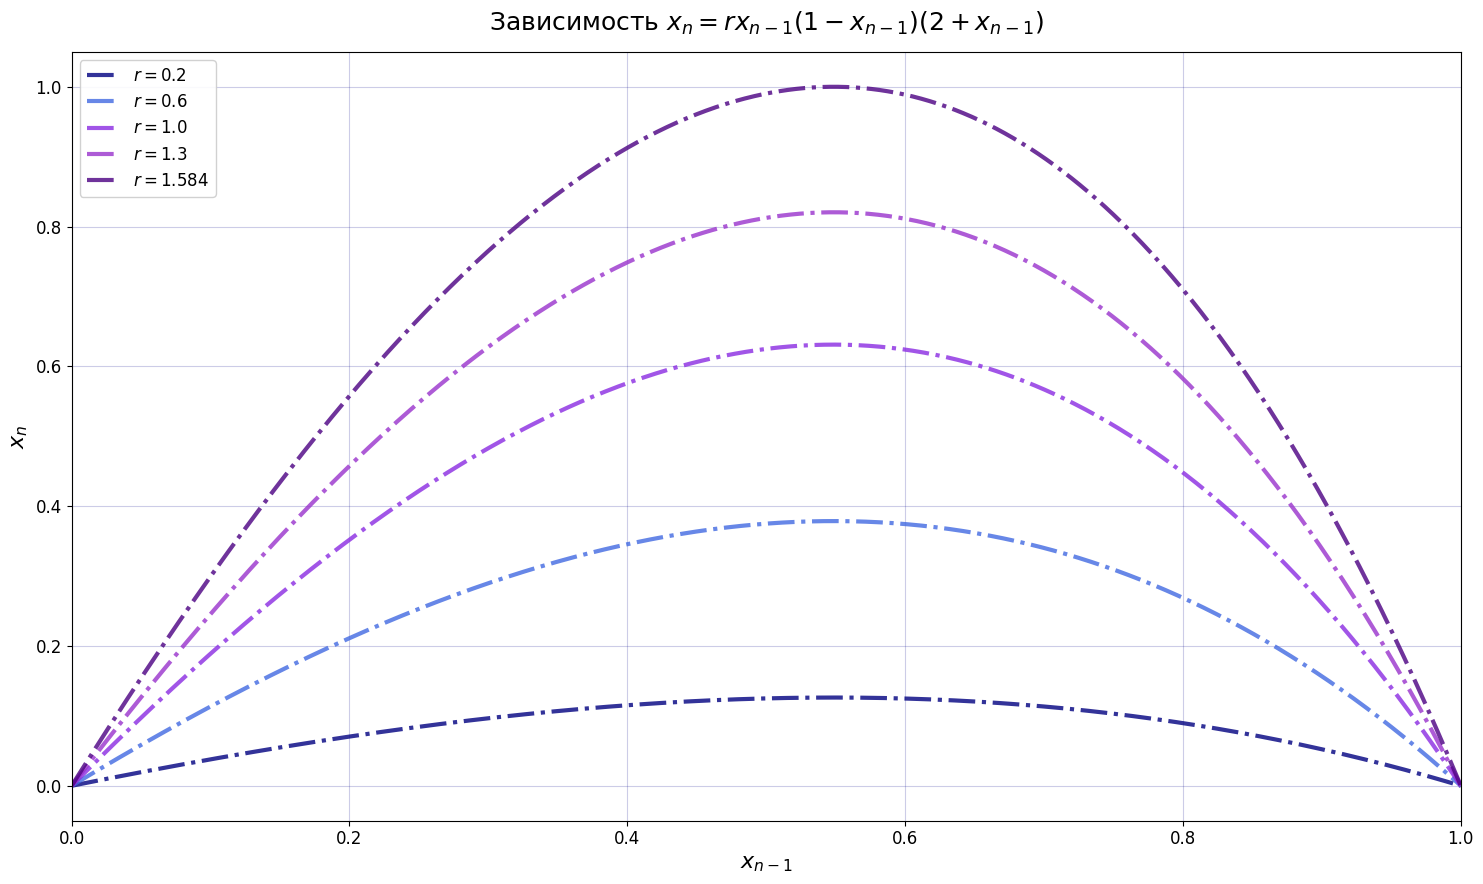

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 1, 1000)
denom = 2 * (7 * np.sqrt(7) - 10)
limit_val = 27 / denom
test_vals = [0.2, 0.6, 1.0, 1.3, limit_val]

plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(15, 9))
# Сине-фиолетовые оттенки вручную
my_colors = ['#000080', '#4169E1', '#8A2BE2', '#9932CC', '#4B0082']

for i, val in enumerate(test_vals):
    ys = val * xs * (1 - xs) * (2 + xs)
    
    lbl_str = f'$r = {val:.3f}$' if val == limit_val else f'$r = {val}$'
    
    plt.plot(xs, ys, label=lbl_str, linewidth=3, linestyle='-.', color=my_colors[i], alpha=0.8)

plt.xlabel('$x_{n-1}$', fontsize=16)
plt.ylabel('$x_n$', fontsize=16)
plt.title('Зависимость $x_n = r x_{n-1} (1 - x_{n-1})(2 + x_{n-1})$', fontsize=18, pad=15)
plt.grid(True, alpha=0.2, linestyle='-', color='#00008B')
plt.legend(loc='upper left', fontsize=12, framealpha=0.9)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

## Сравнение характеристик отображений

**Логистическая модель:**
$$x_{n+1} = r x_n (1 - x_n), \quad r \in (0, 1]$$

**Модель точечного отображения ($N=0$):**
$$x_{n+1} = r x_n (1 - x_n)(2 + x_n), \quad r \in \left[0, \frac{27}{2(7\sqrt{7}-10)}\right]$$

### Общие черты

1.  **Корни уравнения:** Обе функции обращаются в ноль на границах единичного отрезка (при $x=0$ и $x=1$). Это математически обусловлено присутствием множителей $x_n$ и $(1-x_n)$ в структуре обоих уравнений.
2.  **Нелинейная природа:** В обоих случаях зависимость следующего состояния от предыдущего не является прямой пропорциональностью. Наличие степеней выше первой ($x^2$ и $x^3$) создает предпосылки для возникновения сложной динамики.

### Ключевые различия

1.  **Область допустимых значений параметра $r$:**
    *   Для логистического отображения предельное значение $r_{max} = 1$.
    *   Для точечного отображения диапазон шире: $r_{max} \approx 1.58$. Это связано с тем, что дополнительный множитель меняет масштаб функции.

2.  **Геометрия кривой:**
    *   **Логистическое:** График представляет собой идеально симметричную параболу с вершиной ровно посередине интервала ($x=0.5$).
    *   **Точечное:** Кривая описывается кубическим полиномом и обладает выраженной асимметрией. Из-за возрастающего множителя $(2+x)$ пик функции смещается вправо (в область $x > 0.5$), а спад к единице происходит более резко, чем подъем от нуля.
